### What are the features that influence/affect the productivity of the sales team in our US Regional market?

###The reason I came up with this objective is sales leadership might want to know the features we should closely monitor when trying to revamp sales strategies. This way we can select the most important features and provide some sound recommendations to management

## Importing the Data

In [ ]:
import pandas as pd
import seaborn as snsexam
import numpy as np
from sklearn.metrics import r2_score

from sklearn import metrics

import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tabpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/US_Regional_Sales_data_analysis.csv")

Exploring data type and structure

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderNumber        7991 non-null   object 
 1   Sales_Channel      7991 non-null   object 
 2   Sales_Team         7991 non-null   object 
 3   Sales_team_Region  7991 non-null   object 
 4   WarehouseCode      7991 non-null   object 
 5   ProcuredDate       7991 non-null   object 
 6   OrderDate          7991 non-null   object 
 7   ShipDate           7991 non-null   object 
 8   DeliveryDate       7991 non-null   object 
 9   StoreID            7991 non-null   int64  
 10  Product            7991 non-null   object 
 11  Order_Quantity     7991 non-null   int64  
 12  Discount_Applied   7991 non-null   float64
 13  Unit_Price         7991 non-null   float64
 14  Unit_Cost          7991 non-null   float64
 15  Customer_name      7991 non-null   object 
 16  State              7991 

,StoreID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Latitude,Longitude,Population,Household_Income,Median_Income
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7.991000e+03,7.991000e+03,7991.000000
mean,183.850081,4.525341,0.114394,2284.536504,1431.911054,36.885551,-96.406580,2.935633e+05,1.048202e+05,55289.474659
std,105.903946,2.312631,0.085570,1673.096364,1112.413043,5.000273,16.949079,5.189213e+05,1.861819e+05,18838.406741
min,1.000000,1.000000,0.050000,167.500000,68.675000,21.324350,-157.847640,1.002420e+05,0.000000e+00,0.000000
25%,91.000000,3.000000,0.050000,1031.800000,606.115500,33.509210,-116.203450,1.170700e+05,4.234800e+04,42245.500000
50%,183.000000,5.000000,0.075000,1849.200000,1080.576000,37.354110,-93.263840,1.535110e+05,5.425500e+04,50420.000000
75%,276.000000,7.000000,0.150000,3611.300000,2040.250500,40.857450,-82.075000,2.490420e+05,9.043300e+04,66065.000000
max,367.000000,8.000000,0.400000,6566.000000,5498.556000,47.978980,-71.059770,8.550405e+06,3.113535e+06,114098.000000


In [ ]:
df.head()

,OrderNumber,Sales_Channel,Sales_Team,Sales_team_Region,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,StoreID,...,Unit_Price,Unit_Cost,Customer_name,State,Region,Latitude,Longitude,Population,Household_Income,Median_Income
0,SO - 000101,In-Store,Joshua Bennett,Northeast,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,...,1963.1,1001.181,Rochester Ltd,New York,NY,40.64092,-73.31669,213776,68789,80327
1,SO - 000102,Online,Paul Holmes,Midwest,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,...,3939.6,3348.660,Pacific Ltd,Kansas,KS,38.98223,-94.67079,186515,74830,72463
2,SO - 000103,Distributor,Samuel Fowler,Midwest,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,...,1775.5,781.220,"3LAB, Ltd",Michigan,MI,42.27087,-83.72633,117070,47179,55990
3,SO - 000104,Wholesale,Carlos Miller,West,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,...,2324.9,1464.687,"Fenwal, Corp",Connecticut,CT,41.30815,-72.92816,130322,49771,37192
4,SO - 000105,Distributor,Joe Price,Northeast,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,...,1822.4,1476.144,Bare,Connecticut,CT,41.55815,-73.05150,108802,40213,40467


## Missing Values

Seeing which columns have the most missing values

In [ ]:
null_count= df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
0,OrderNumber,0,0.0
12,Discount_Applied,0,0.0
21,Household_Income,0,0.0
20,Population,0,0.0
19,Longitude,0,0.0
18,Latitude,0,0.0
17,Region,0,0.0
16,State,0,0.0
15,Customer_name,0,0.0
14,Unit_Cost,0,0.0


No missing data hence no need to clean data

###Correlations in features of the data

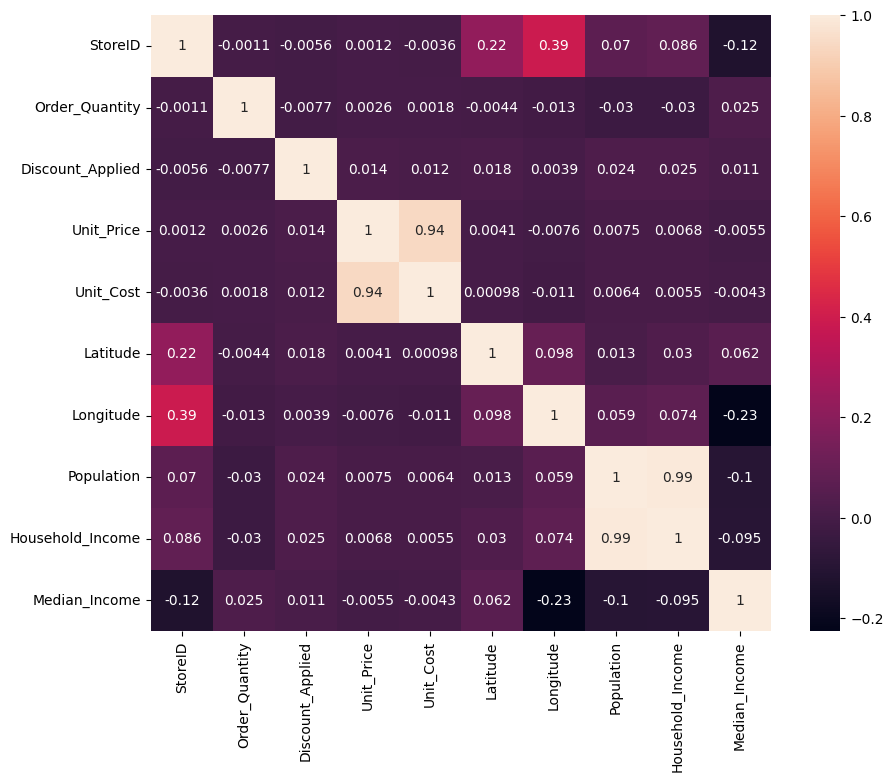

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot = True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderNumber        7991 non-null   object 
 1   Sales_Channel      7991 non-null   object 
 2   Sales_Team         7991 non-null   object 
 3   Sales_team_Region  7991 non-null   object 
 4   WarehouseCode      7991 non-null   object 
 5   ProcuredDate       7991 non-null   object 
 6   OrderDate          7991 non-null   object 
 7   ShipDate           7991 non-null   object 
 8   DeliveryDate       7991 non-null   object 
 9   StoreID            7991 non-null   int64  
 10  Product            7991 non-null   object 
 11  Order_Quantity     7991 non-null   int64  
 12  Discount_Applied   7991 non-null   float64
 13  Unit_Price         7991 non-null   float64
 14  Unit_Cost          7991 non-null   float64
 15  Customer_name      7991 non-null   object 
 16  State              7991 

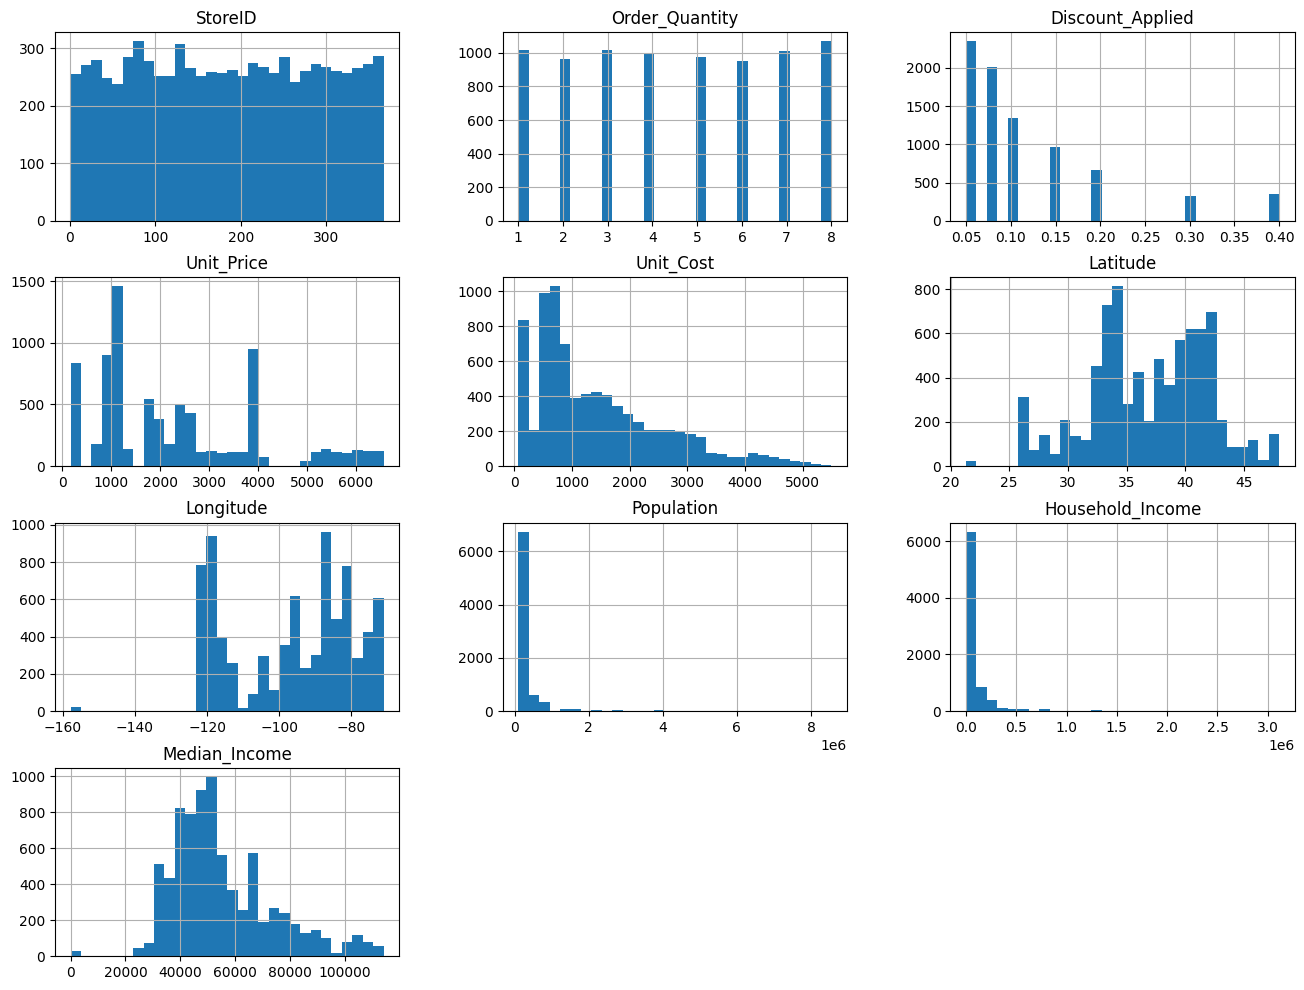

In [ ]:
#Plot a histogram for each numerical attribute
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(16,12))
plt.show()

Use LabelEncoder to do the numeric transformation for objects

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

##MODEL BUILDING

Train Test Split

In [ ]:
# Create feature and target variable for problem
X_class= df.drop('Sales_Team', axis=1)
y_class = df['Sales_Team']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_class,y_class,train_size=0.8)

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.fit_transform(x_test)

In [ ]:
x_train.shape

(6392, 22)

## FEATURE IMPORTANCE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(rescaledX_train,y_train)

In [ ]:
rf.feature_importances_

array([0.03826568, 0.2190345 , 0.19765799, 0.00832273, 0.00652332,
       0.02154401, 0.02119454, 0.02137581, 0.03020306, 0.04690739,
       0.02542192, 0.02140842, 0.04501177, 0.04862334, 0.04631559,
       0.00786493, 0.00744636, 0.03944248, 0.03756169, 0.03379165,
       0.03308162, 0.0430012 ])

In [ ]:
feature_scores = pd.Series(data=rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
#feature_scores = pd.Series(x_train.columns, index=rf.feature_importances_).sort_values(ascending=False)

feature_scores

Sales_Channel        0.219034
Sales_team_Region    0.197658
Unit_Cost            0.048623
Product              0.046907
Customer_name        0.046316
Unit_Price           0.045012
Median_Income        0.043001
Latitude             0.039442
OrderNumber          0.038266
Longitude            0.037562
Population           0.033792
Household_Income     0.033082
StoreID              0.030203
Order_Quantity       0.025422
OrderDate            0.021544
Discount_Applied     0.021408
DeliveryDate         0.021376
ShipDate             0.021195
WarehouseCode        0.008323
State                0.007865
Region               0.007446
ProcuredDate         0.006523
dtype: float64

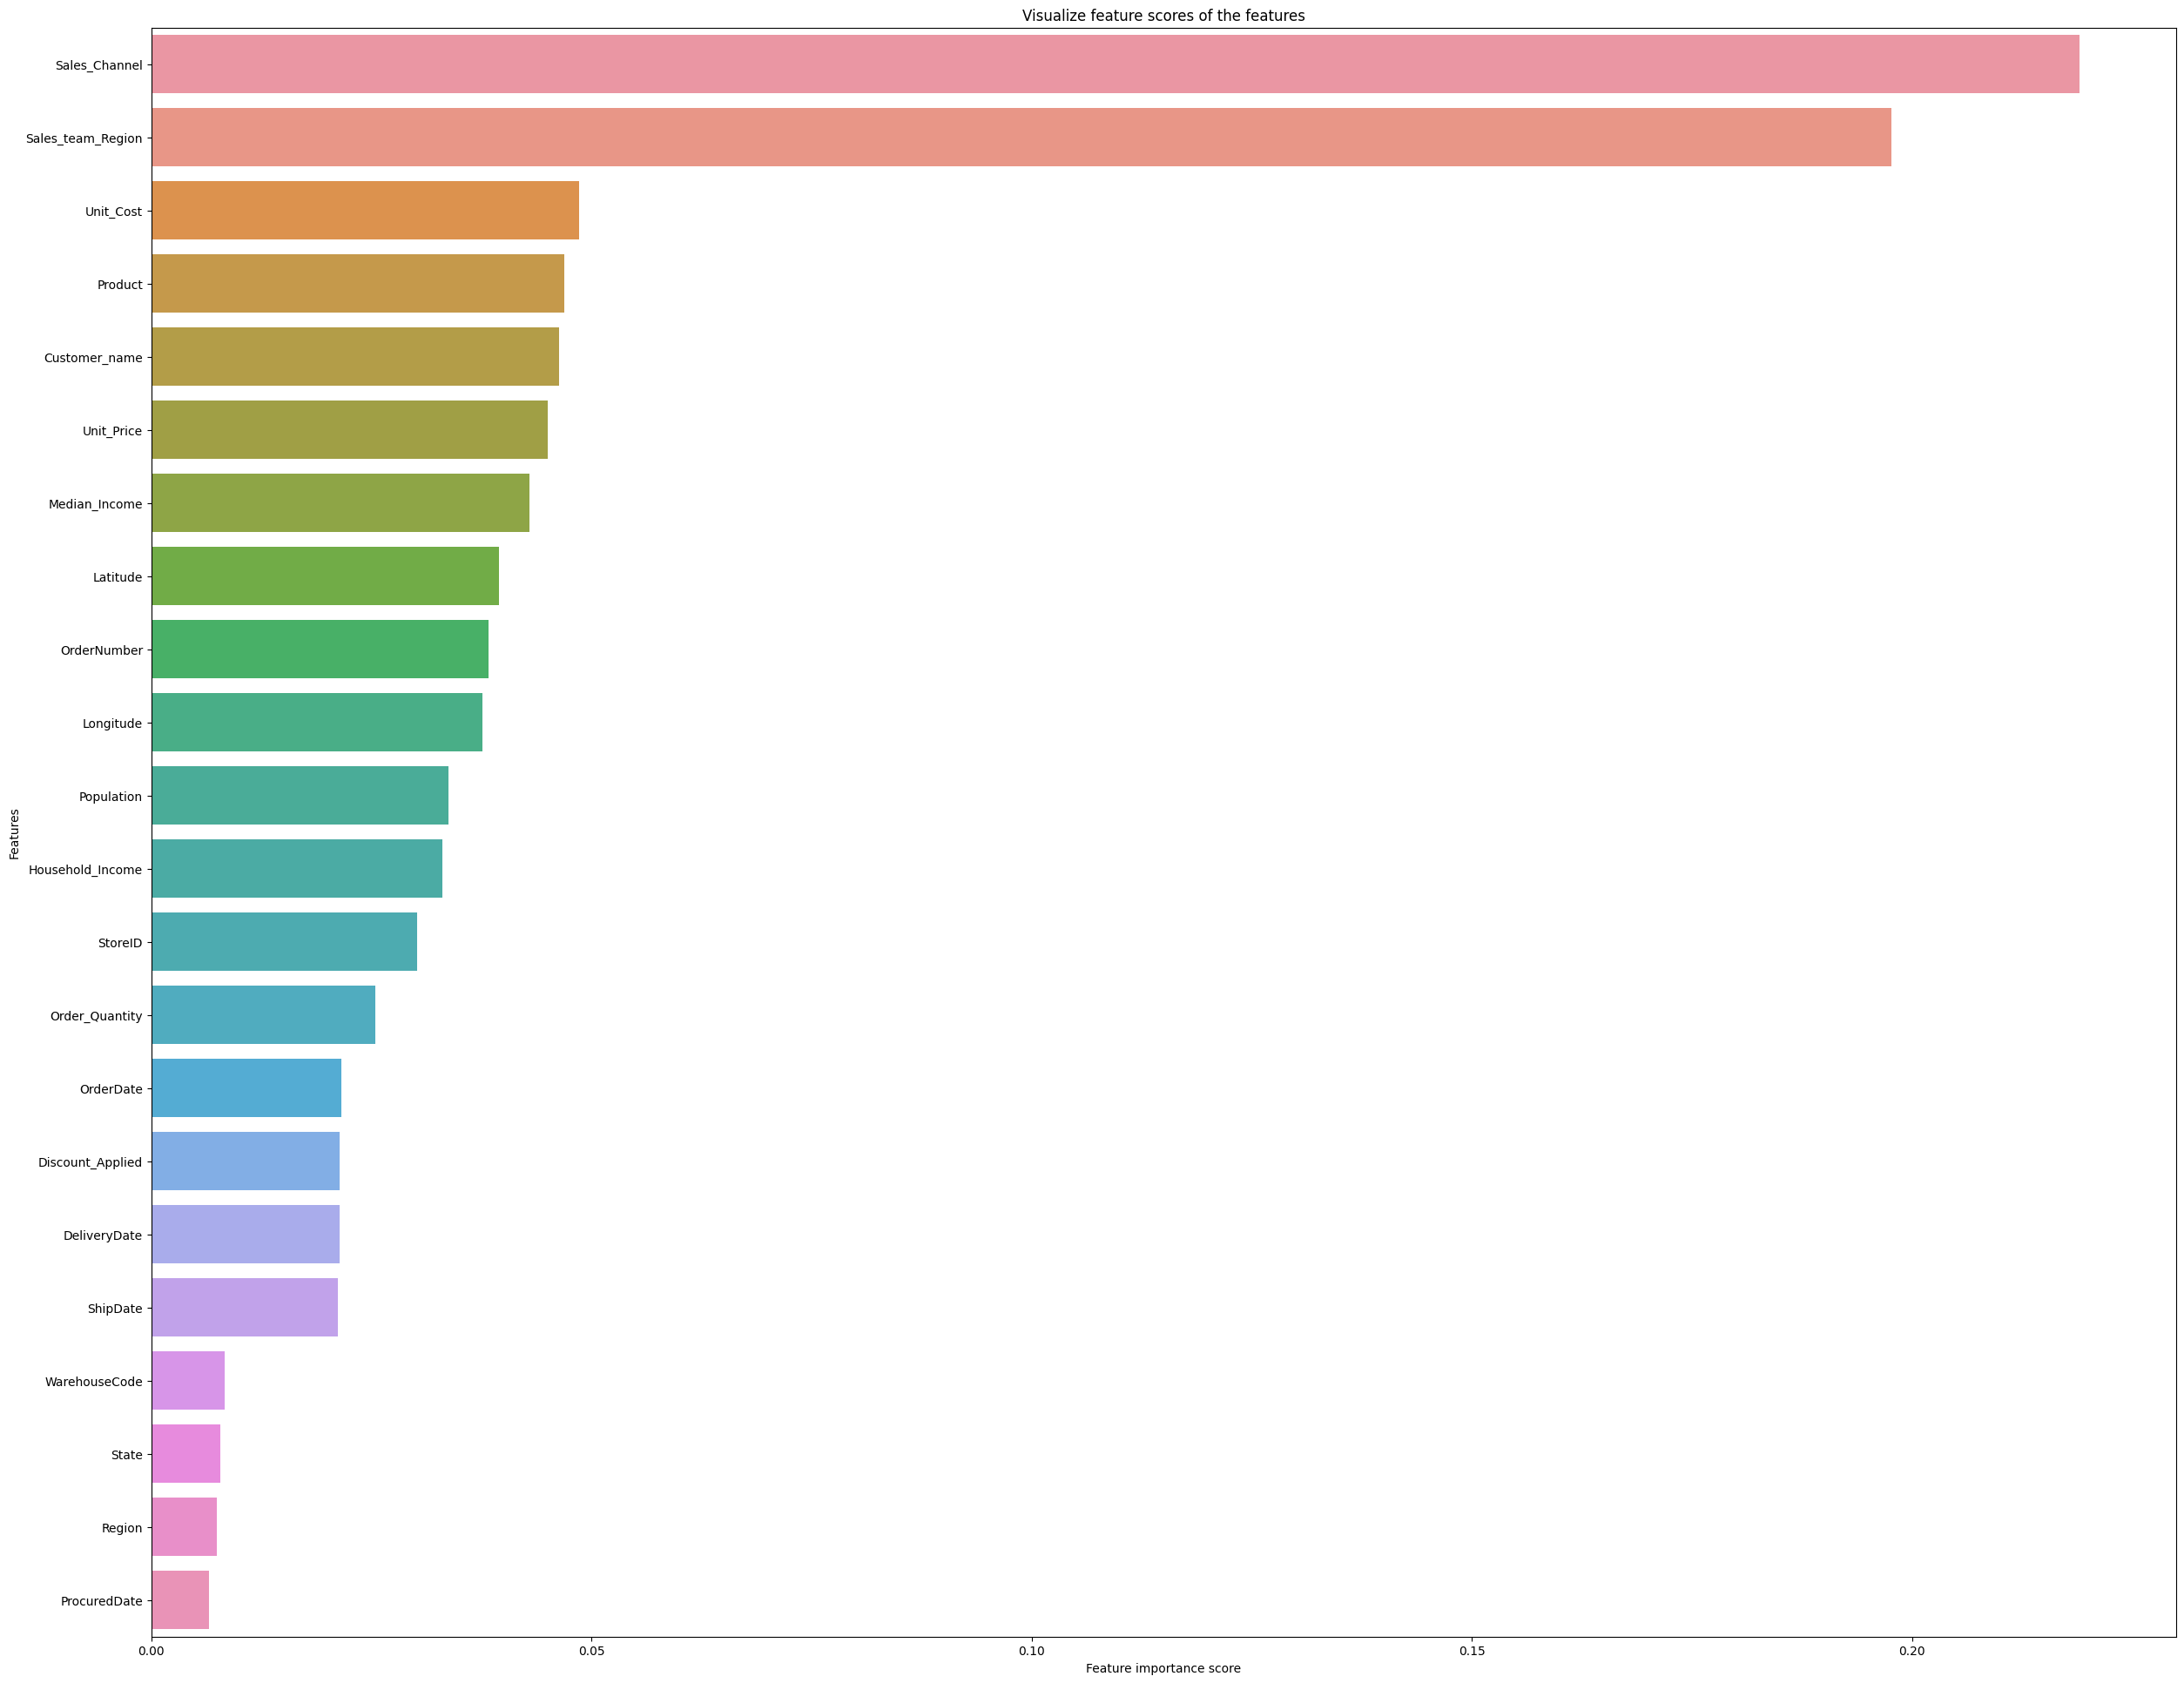

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=feature_scores, \
                 orient = 'h', order=feature_scores)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
y_pred = rf.predict(rescaledX_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.954727954971857
Mean Squared Error: 44.0125005003127
Root Mean Squared Error: 6.634191774459998
r2_score: 0.3641041472685568


###Top 10 features in order

1.   Sales_Channel:        21.9034%
2.   Sales_team_Region:    19.7658%
3.   Unit_Cost             4.8623%
4.   Product               4.6907%
5.   Customer_name         4.6316%
6.   Unit_Price            4.5012%
7.   Median_Income         4.3001%
8.   Latitude              3.9442%
9.   OrderNumber           3.8266%
10.  Longitude             3.7562%